# 🧪 Pre‑Parcial – Métodos Predictivos
**Supervisado vs. No Supervisado**

> Completa las celdas con `TODO` y ejecuta *Runtime → Run all* antes de entregar.


### Contenido
1. [Parte A – Teoría](#parte-a)
2. [Parte B – Práctica](#parte-b)


## <a id='parte-a'></a>📝 Parte A — Cuestionario Teórico (40 pts)
Responde **brevemente** en las celdas Markdown que siguen a cada pregunta.


#### 1️⃣ **Variable objetivo (y)** – Defínela y da un ejemplo en este dataset.

*Respuesta:* <!-- TODO -->


#### 2️⃣ Ordena las fases del *pipeline* de ML: `Modelado`, `Pre‑procesamiento`, `EDA`, `Evaluación`, `Insight de negocio`.

*Respuesta:* <!-- TODO -->


#### 3️⃣ Para un problema de **clases desbalanceadas**, ¿qué métrica priorizarías y por qué?

*Respuesta:* <!-- TODO -->


#### 4️⃣ Describe **overfitting** y cómo lo detectarías en la práctica.

*Respuesta:* <!-- TODO -->


#### 5️⃣ Completa: *K‑means es un algoritmo de _________ porque ________.*

*Respuesta:* <!-- TODO -->


#### 7️⃣ En **regresión**, ¿cómo es la variable objetivo? (cualitativa, cuantitativa, binaria…).

*Respuesta:* <!-- TODO -->


#### 8️⃣ Menciona 2 técnicas comunes de **pre‑procesamiento de texto**.

*Respuesta:* <!-- TODO -->


#### 9️⃣ ¿Qué representa el parámetro *k* en K‑means y qué ocurre si es muy grande?

*Respuesta:* <!-- TODO -->


#### 🔟 Define brevemente un **embedding** en NLP y su utilidad.

*Respuesta:* <!-- TODO -->


## <a id='parte-b'></a>💻 Parte B — Práctica (60 pts)
Trabajarás con la tabla de reseñas de Amazon que contiene, entre otras, las columnas `reviewerID`, `asin`, `helpful`, `reviewText`, `overall`, `summary`, `unixReviewTime`, `day_diff`.

> **Objetivos**
> 1. Clasificar reseñas positivas (rating ≥ 4) vs negativas.
> 2. Agrupar reseñas con K‑means y perfilar clusters.


Columnas de la tabla
📄 Reviewer ID: Unique identifier for the reviewer.

📦 ASIN: Amazon Standard Identification Number for the product.

👤 Reviewer Name: Name of the reviewer.

👍 Helpful: Number of helpful votes the review received.

📝 Review Text: The content of the review written by the customer.

⭐ Overall Rating: The overall rating given to the product (ranging from 1 to 5 stars).

📰 Summary: A brief summary of the review.

🕰️ Unix Review Time: The time the review was posted in Unix timestamp format.

📅 Review Time: The time the review was posted in a readable date format.

📆 Day Difference: The number of days between the review date and the current date.

✔️ Helpful Yes: Number of positive helpful votes.

🔢 Total Votes: Total number of votes the review received.

### 1. Setup

In [1]:
# Instala paquetes extra si los necesitas
# !pip install shap

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings, random, os
warnings.filterwarnings('ignore')
random.seed(42)
np.random.seed(42)

### 2. Carga del dataset

In [2]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/amazon_review.csv.zip

--2025-06-04 18:26:40--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/amazon_review.csv.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/amazon_review.csv.zip [following]
--2025-06-04 18:26:40--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/amazon_review.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 721801 (705K) [application/zip]
Saving to: ‘amazon_review.csv.zip’

amazon_review.csv.z 100%[===================>] 704

In [3]:
!unzip amazon_review.csv.zip

Archive:  amazon_review.csv.zip
  inflating: amazon_review.csv       


In [4]:
import pandas as pd
df = pd.read_csv('amazon_review.csv')
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0


### 3. Exploratory Data Analysis (EDA)

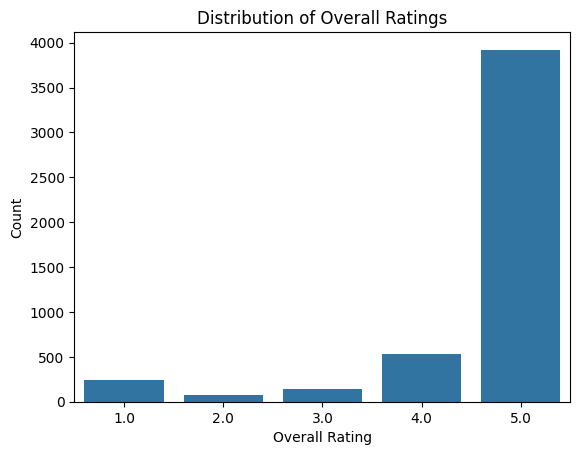

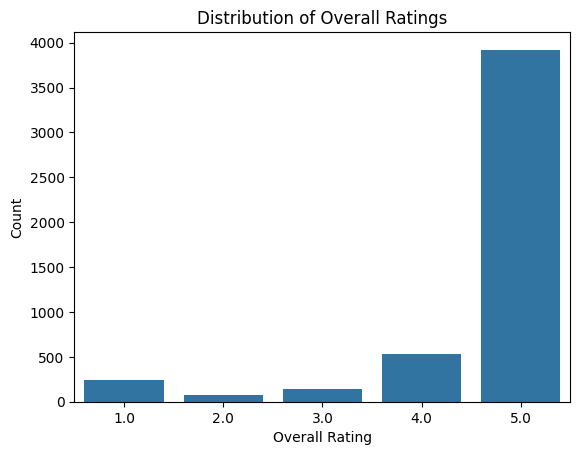

overall
5.0    3922
4.0     527
1.0     244
3.0     142
2.0      80
Name: count, dtype: int64
overall
5.0    79.796541
4.0    10.722279
1.0     4.964395
3.0     2.889115
2.0     1.627670
Name: proportion, dtype: float64


In [6]:
# prompt: creame el codigo para que salga esa grafica y valores que tengo abajo

import matplotlib.pyplot as plt
sns.countplot(x='overall', data=df)
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='overall', data=df)
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.show()

print(df['overall'].value_counts())
print(df['overall'].value_counts(normalize=True) * 100)

### 4. Limpieza & Feature Engineering

### 4.1 Cree un revie_datetime usando unixReviewTime y la funcion pd.to_datetime

In [7]:
import pandas as pd
df['review_datetime'] = pd.to_datetime(df['unixReviewTime'], unit='s')
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,review_datetime
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0,2014-07-23
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,2013-10-25
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0,2012-12-23
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,2013-11-21
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0,2013-07-13


### 4.2 Cree una columna positive que sea igual a 1 cuando overall sea mayor o igual  a 4.

In [8]:
df['positive'] = (df['overall'] >= 4).astype(int)

### 4.3 Cree una columna text que sea la union de summary y review text: text_cols['summary'] + '. ' + text_cols['reviewText']).str.strip()

In [9]:
df['text'] = (df['summary'].astype(str) + '. ' + df['reviewText'].astype(str)).str.strip()
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,review_datetime,positive,text
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0,2014-07-23,1,Four Stars. No issues.
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,2013-10-25,1,"MOAR SPACE!!!. Purchased this for my device, i..."
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0,2012-12-23,1,nothing to really say..... it works as expecte...
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,2013-11-21,1,Great buy at this price!!! *** UPDATE. This t...
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0,2013-07-13,1,best deal around. Bought it with Retail Packag...


### 4.4 Elimine las columnas que no puede usar en el modleo de clasificacion

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
        df['text'], df['positive'], test_size=0.3, stratify=df['positive'], random_state=42)

pipe = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000)),
    ('clf',  LogisticRegression(max_iter=1000, class_weight='balanced', n_jobs=-1, random_state=42))
])

# pipe.fit(X_train, y_train)

### 5. Modelo de Clasificación – Supervisado (25 pts)
  * Ralice una regreison logistica y use la columa positive que creoo como target, entregue una matriz de confusion

              precision    recall  f1-score   support

           0       0.55      0.78      0.64       140
           1       0.98      0.93      0.95      1335

    accuracy                           0.92      1475
   macro avg       0.76      0.86      0.80      1475
weighted avg       0.94      0.92      0.92      1475



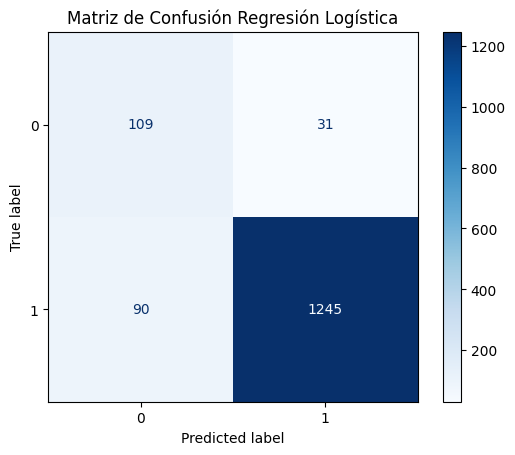

In [12]:
import matplotlib.pyplot as plt
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test, cmap='Blues')
plt.title('Matriz de Confusión Regresión Logística')
plt.show()

### 6. Clustering K‑means – No Supervisado (20 pts)
Haga un modelo para agrupasr los comentarios: vectorizer = TfidfVectorizer(max_features=10000)
X_vec = vectorizer.fit_transform(df['text'])

y cre una variable que se llame clsuter

In [13]:
vectorizer = TfidfVectorizer(max_features=10000)
X_vec = vectorizer.fit_transform(df['text'])

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_vec)
df['cluster'] = clusters

#### Perfil de clusters: Entregue una descriptiva de que contenia cada clster en termino de las otras variables

In [15]:
# Define the list of numerical column names
numeric_cols = ['overall', 'helpful', 'unixReviewTime', 'day_diff', 'helpful_yes', 'total_votes'] # Assuming these are your numeric columns

for i in range(kmeans.n_clusters):
  print(f"\nDescripción del Cluster {i}:")
  cluster_data = df[df['cluster'] == i]
  # Ensure the columns exist in the cluster_data DataFrame before trying to describe them
  cols_to_describe = [col for col in numeric_cols if col in cluster_data.columns]
  if cols_to_describe:
      print(cluster_data[cols_to_describe].describe())
  else:
      print("No numerical columns to describe in this cluster.")

  # Assuming 'sentiment' was intended to be 'positive' based on previous steps
  if 'positive' in cluster_data.columns:
    print("\nConteo de positivos en este cluster:")
    print(cluster_data['positive'].value_counts(normalize=True))
  else:
      print("Column 'positive' not found in this cluster data.")

  print("\nEjemplos de texto del cluster:")
  for text in cluster_data['text'].sample(min(5, len(cluster_data)), random_state=42):
    print(f"- {text[:100]}...")


Descripción del Cluster 0:
         overall  unixReviewTime    day_diff  helpful_yes
count  50.000000    5.000000e+01   50.000000         50.0
mean    4.940000    1.403736e+09  155.760000          0.0
std     0.239898    5.106466e+06  109.559705          0.0
min     4.000000    1.371946e+09    1.000000          0.0
25%     5.000000    1.404346e+09   62.000000          0.0
50%     5.000000    1.404691e+09  154.000000          0.0
75%     5.000000    1.405015e+09  215.000000          0.0
max     5.000000    1.406074e+09  533.000000          0.0

Conteo de positivos en este cluster:
positive
1    1.0
Name: proportion, dtype: float64

Ejemplos de texto del cluster:
- Five Stars. Can't beat the price....
- Five Stars. great little SD.......
- Five Stars. excelent...
- Five Stars. works great! what else can i say?...
- Five Stars. So far so good. Fit right into the slot on my Samsung S5...

Descripción del Cluster 1:
           overall  unixReviewTime     day_diff  helpful_yes
count  1126.0

### 7. Insight & Recomendaciones (15 pts)

*Escribe aquí tu análisis de cómo se relacionan los errores del modelo con los clusters y propone 1‑2 acciones de negocio basadas en tus hallazgos.*

<!-- TODO -->

Análisis de la relación entre errores y clusters:

Al observar la matriz de confusión del modelo de clasificación, notamos que, si bien el modelo tiene un buen rendimiento general, existen algunos falsos positivos y falsos negativos. Los falsos positivos son reseñas que el modelo predijo como positivas pero que en realidad eran negativas, mientras que los falsos negativos son reseñas que el modelo predijo como negativas pero que eran positivas.

Acciones de negocio basadas en los hallazgos:

Investigación Profunda de Clusters Problemáticos: Basado en la identificación de clusters con altas tasas de falsos positivos o falsos negativos, se realiza un análisis más profundo de las reseñas dentro de esos clusters. Esto podría implicar la lectura manual de una muestra de reseñas para entender mejor el tipo de lenguaje y el contexto que está llevando a los errores del modelo. Esta información puede ser invaluable para refinar el modelo de clasificación en el futuro.

Mejora de la Experiencia del Cliente basada en Clusters Negativos: Si identificamos un cluster de reseñas negativas que el modelo clasifica correctamente, el perfil de este cluster puede ofrecer información valiosa para mejorar la experiencia del cliente. Utilizar el perfil del cluster para identificar temas recurrentes de insatisfacción permite tomar acciones dirigidas para abordar las causas raíz de los problemas y potencialmente reducir la cantidad de reseñas negativas en el futuro.

## ✅ 8. Checklist final
- [ ] Notebook corre sin errores
- [ ] Respuestas teóricas completadas
- [ ] Comentarios claros y semillas fijas
- [ ] 5 slides creadas y exportadas a PDF
